In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 94F3-F0D9

 Directory of C:\Users\nikx1\OneDrive\Desktop\Cohort10\Python\Projects\Notebooks

03/11/2025  04:04 PM    <DIR>          .
03/10/2025  03:31 PM    <DIR>          ..
03/10/2025  03:38 PM    <DIR>          .ipynb_checkpoints
03/10/2025  03:07 PM           378,853 gdp_percapita.csv.csv
03/11/2025  04:04 PM           316,258 ProjectUNData.ipynb
               2 File(s)        695,111 bytes
               3 Dir(s)  379,035,590,656 bytes free


In [89]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [90]:
gdp_df.shape

(8219, 4)

In [91]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [92]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [93]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})


In [94]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   GDP_Per_Capita   8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


How many countries have data for all years? 228
Which countries are missing many years of data? 19
Look at the number of observations per year. What do you notice?
Observations were increasing or steady until 2022.

In [96]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

max_years = gdp_df['Year'].nunique()

countries_with_all_years = country_year_counts[country_year_counts == max_years]
print(countries_with_all_years)

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


In [97]:
missing_data_countries = country_year_counts[country_year_counts < max_years]
print(missing_data_countries.sort_values())

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
Afghanistan                  24
CuraÃ§ao                     24
San Marino                   26
Montenegro                   27
Serbia                       29
West Bank and Gaza           30
Greenland                    32
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Bhutan                       33
Lebanon                      33
Name: Year, dtype: int64


In [98]:
year_counts = gdp_df['Year'].value_counts().sort_index()
print(year_counts)

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: count, dtype: int64


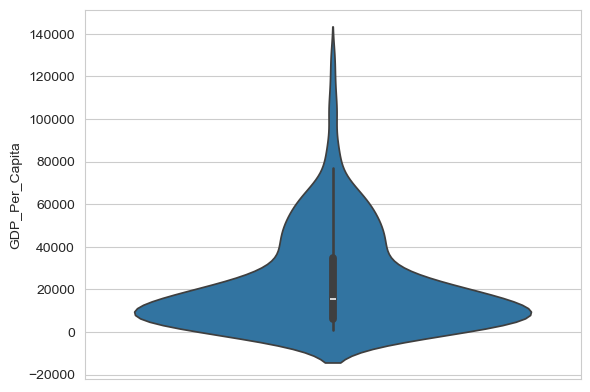

In [99]:
sns.violinplot(y = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020])
plt.show()

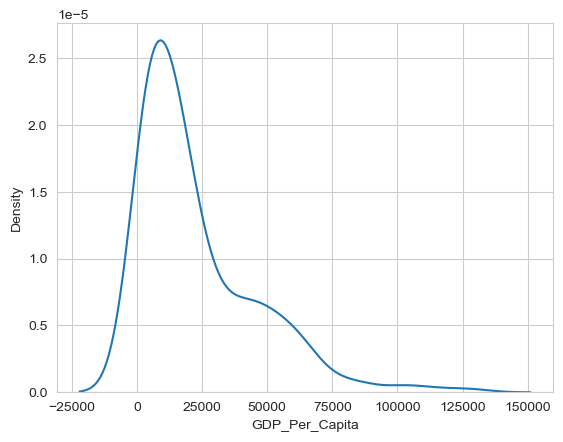

In [100]:
sns.kdeplot(x = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020]) 
plt.show()

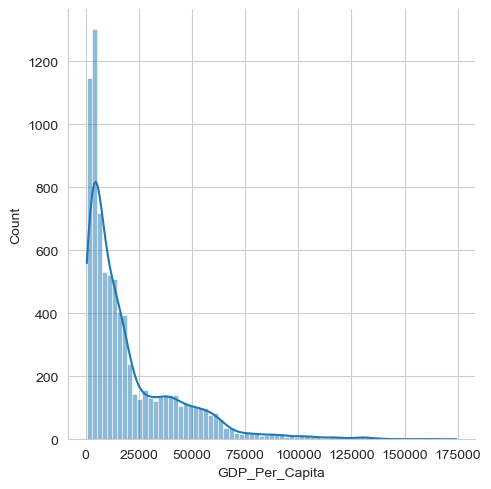

In [101]:
sns.displot( data = gdp_df["GDP_Per_Capita"], kde=True ) 
plt.show()

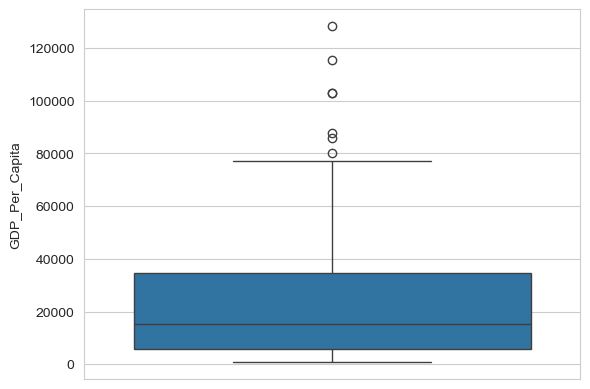

In [102]:
sns.boxplot(y = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020])
plt.show()

What was the median GDP per capita value in 2020?

Median GDP Per Capita for 2020: 15309.23598817024


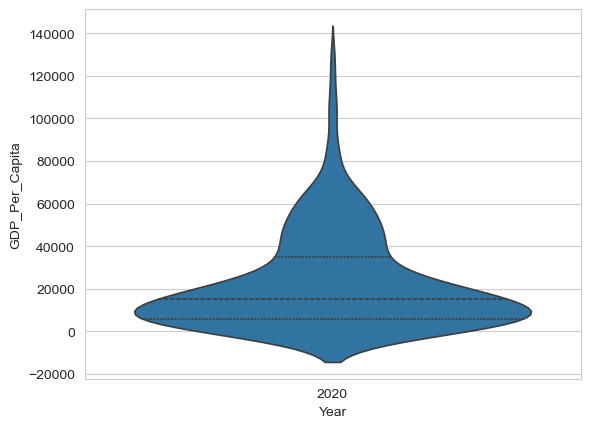

In [104]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020]

sns.violinplot(
     data=gdp_2020, 
    x="Year", 
    y="GDP_Per_Capita", 
    inner="quartile"
)
median_2020 = gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"].median()
print("Median GDP Per Capita for 2020:", median_2020)

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
    A boxplot
    A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
    A scatterplot
    A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [106]:
gdp_subset = gdp_subset.sort_values("Year")
print(gdp_subset.head(10))

      Year  GDP_Per_Capita
8218  1990     4013.299059
6319  1990     3990.926713
2675  1990    42335.309536
2641  1990    12917.094427
6379  1990    60101.575626
2607  1990    23884.810700
2573  1990    38620.937597
6413  1990     2923.344125
2709  1990     2785.671143
2539  1990     6062.707946


In [107]:
gdp_decades = [1990, 2000, 2010, 2020]
gdp_subset = gdp_df[gdp_df["Year"].isin(gdp_decades)][["Year","GDP_Per_Capita"]]
print(gdp_subset.head(10))

    Year  GDP_Per_Capita
3   2020     2769.685745
13  2010     2848.586061
23  2000     1617.826475
27  2020     3861.111238
37  2010     3863.836012
47  2000     3176.568655
57  1990     3386.854480
61  2020     4622.731427
71  2010     4343.405839
81  2000     3139.324872


In [108]:
type(gdp_subset)

pandas.core.frame.DataFrame

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

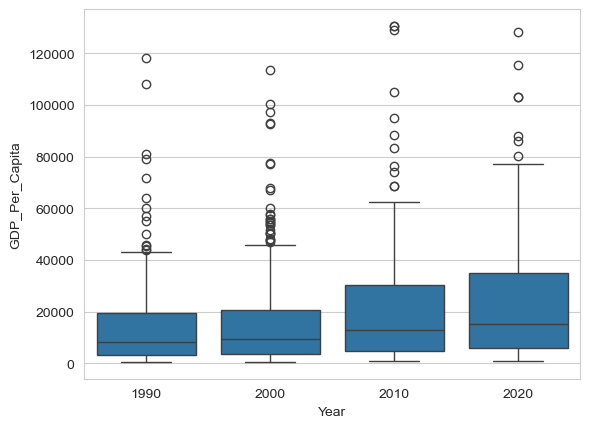

In [109]:
gdp_selected_years = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
sns.boxplot( x=gdp_selected_years["Year"], y=gdp_selected_years["GDP_Per_Capita"])


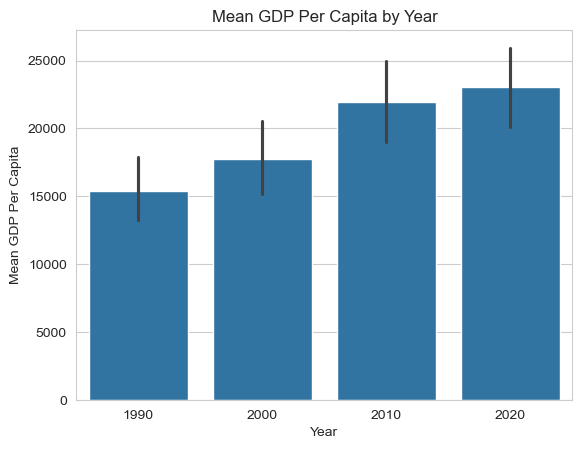

In [110]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_selected_years, estimator="mean")

# Customize the plot (optional)
plt.xlabel("Year")
plt.ylabel("Mean GDP Per Capita")
plt.title("Mean GDP Per Capita by Year")

# Show the plot
plt.show()

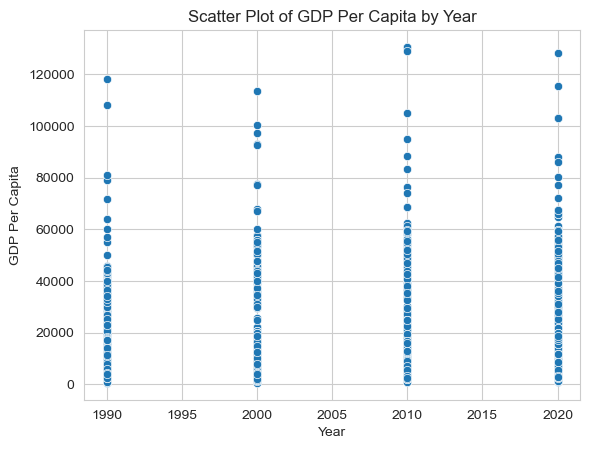

In [111]:
sns.scatterplot(x="Year", y="GDP_Per_Capita", data=gdp_selected_years)

# Customize the plot (optional)
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("Scatter Plot of GDP Per Capita by Year")

# Show the plot
plt.show()

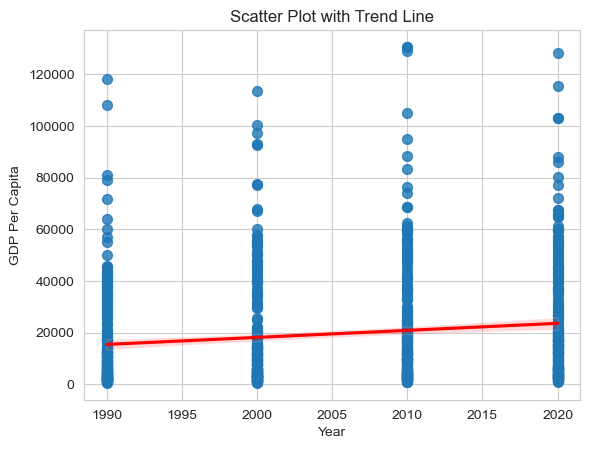

In [112]:
sns.regplot(x="Year", y="GDP_Per_Capita", data=gdp_selected_years, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Customize the plot (optional)
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("Scatter Plot with Trend Line")

# Show the plot
plt.show()

Which country was the first to have a GDP per capita greater than $100,000?

In [142]:
df_filtered = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

first_country = df_filtered.sort_values("Year").iloc[0]

print(f"The first country to exceed $100,000 GDP per capita was {first_country['Country']} in {first_country['Year']}.")

The first country to exceed $100,000 GDP per capita was United Arab Emirates in 1990.


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [145]:
df_2020 = gdp_df[gdp_df["Year"] == 2020]

highest_gdp_country = df_2020.loc[df_2020["GDP_Per_Capita"].idxmax(), "Country"]

print(f"The country with the highest GDP per capita in 2020 was {highest_gdp_country}.")


The country with the highest GDP per capita in 2020 was Luxembourg.


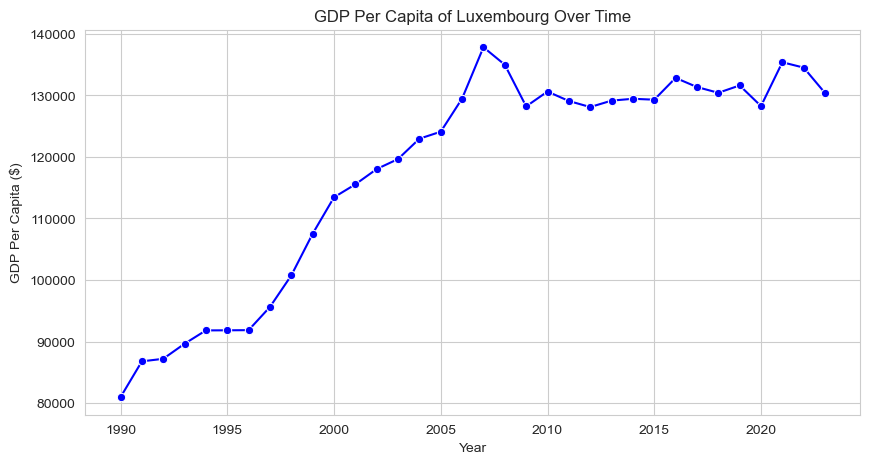

In [153]:
df_country = gdp_df[gdp_df["Country"] == highest_gdp_country]
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_country["Year"], y=df_country["GDP_Per_Capita"], marker="o", color="blue")
plt.title(f"GDP Per Capita of {highest_gdp_country} Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita ($)")
plt.grid(True)
plt.show()

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [151]:
df_2020 = gdp_df[gdp_df["Year"] == 2020]

lowest_gdp_country = df_2020.loc[df_2020["GDP_Per_Capita"].idxmin(), "Country"]

print(f"The country with the lowest GDP per capita in 2020 was {lowest_gdp_country}.")

The country with the lowest GDP per capita in 2020 was Burundi.


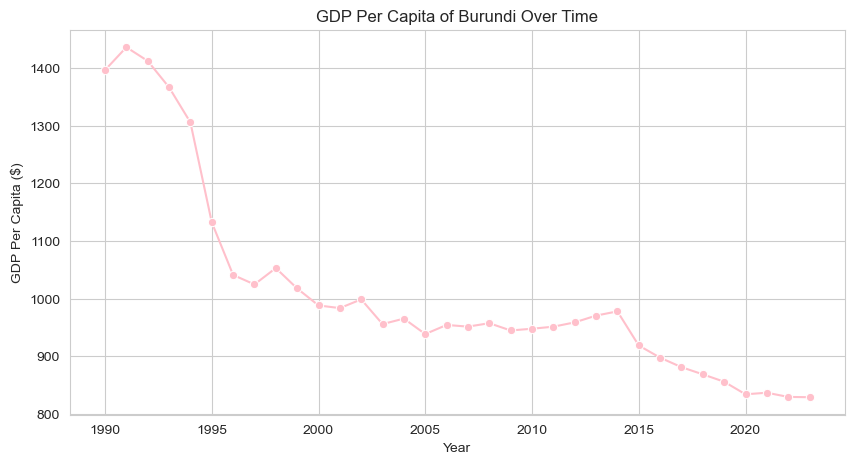

In [155]:
df_country = gdp_df[gdp_df["Country"] == lowest_gdp_country]
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_country["Year"], y=df_country["GDP_Per_Capita"], marker="o", color="pink")
plt.title(f"GDP Per Capita of {lowest_gdp_country} Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita ($)")
plt.grid(True)
plt.show()

 Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [167]:
internet_df = pd.read_csv('../data/internet_use.csv.csv')
internet_df.head()

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4
0,Afghanistan,2019,17.6,1,NaN
1,Afghanistan,2018,16.8,2,NaN
2,Afghanistan,2017,13.5,3,NaN
3,Afghanistan,2016,11,4,NaN
4,Afghanistan,2015,8.26,4,NaN


In [169]:
internet_df.shape

(6382, 5)

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [172]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [174]:
internet_df.head()

,Country,Year,Internet_Users_Pct,Value Footnotes,Unnamed: 4
0,Afghanistan,2019,17.6,1,NaN
1,Afghanistan,2018,16.8,2,NaN
2,Afghanistan,2017,13.5,3,NaN
3,Afghanistan,2016,11,4,NaN
4,Afghanistan,2015,8.26,4,NaN


In [180]:
internet_df = internet_df.drop(["Value Footnotes", "Unnamed: 4"], axis = 1)

In [182]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.6
1,Afghanistan,2018,16.8
2,Afghanistan,2017,13.5
3,Afghanistan,2016,11
4,Afghanistan,2015,8.26


Look at the number of observations in this dataset per year. What do you notice?

In [189]:
yearly_counts = internet_df["Year"].value_counts().head(10)

print(yearly_counts)

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
Name: count, dtype: int64


What is the first year to have a non-zero internet users percentage value?

In [193]:
internet_df["Internet_Users_Pct"] = pd.to_numeric(internet_df["Internet_Users_Pct"], errors="coerce")

df_nonzero = internet_df[internet_df["Internet_Users_Pct"] > 0]

first_year = df_nonzero["Year"].min()

print(f"The first year with a non-zero internet users percentage is {first_year}.")

The first year with a non-zero internet users percentage is 1990.


How does the distribution of internet users percent differ for 2000 and 2014?

        Country  Year  Internet_Users_Pct
9   Afghanistan  2014            4.000000
23      Albania  2000           68.550400
33      Albania  2014           41.200000
47      Albania  2000            0.011169
67      Algeria  2014            4.634480
count    360.000000
mean      31.569069
std       31.465941
min        0.000000
25%        2.346465
50%       22.205550
75%       55.970000
max      100.000000
Name: Internet_Users_Pct, dtype: float64
Remaining data points: 360


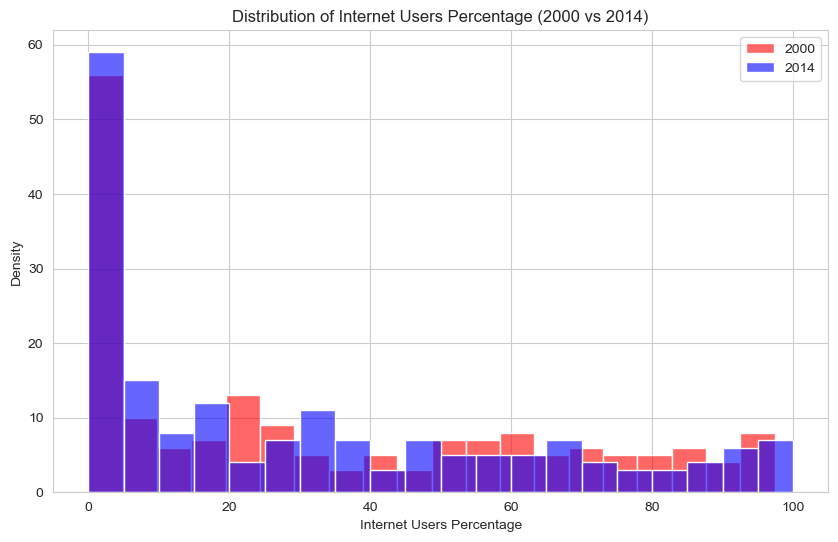

In [223]:
internet_df["Internet_Users_Pct"] = pd.to_numeric(internet_df["Internet_Users_Pct"], errors="coerce")
internet_df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df_filtered = internet_df[internet_df["Year"].isin([2000, 2014])]

print(df_filtered.head()) 
print(df_filtered["Internet_Users_Pct"].describe())

df_filtered = df_filtered.dropna(subset=["Internet_Users_Pct"])

print(f"Remaining data points: {len(df_filtered)}")


plt.figure(figsize=(10, 6))
sns.histplot(df_filtered[df_filtered["Year"] == 2000]["Internet_Users_Pct"], label="2000", bins=20, color="red", alpha=0.6)
sns.histplot(df_filtered[df_filtered["Year"] == 2014]["Internet_Users_Pct"], label="2014", bins=20, color="blue", alpha=0.6)

plt.title("Distribution of Internet Users Percentage (2000 vs 2014)")
plt.xlabel("Internet Users Percentage")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()